# Homework w06d01


### Read in the Wisconsin Breast Cancer Dataset

### Assign the columns

The attributes below will be the columns of the dataset.
  
Attribute                     

1. Sample code number [subject ID]
1. Class
1. Cell nucleus mean radius
1. Cell nucleus SE radius
1. Cell nucleus worst radius
1. Texture mean
1. Texture SE
1. Texture worst
1. Perimeter mean
1. Perimeter SE
1. Perimeter worst
1. Area mean
1. Area SE
1. Area worst
1. Smoothness mean
1. Smoothness SE
1. Smoothness worst
1. Compactness mean
1. Compactness SE
1. Compactness worst
1. Concavity mean
1. Concavity SE
1. Concavity worst
1. Concave points mean
1. Concave points SE
1. Concave points worst
1. Symmetry mean
1. Symmetry SE
1. Symmetry worst
1. Fractal dimension mean
1. Fractal dimension SE
1. Fractal dimension worst

The column names are taken from the dataset info file.
For more information check out the information file: wdbc.names.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score, precision_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']

df.columns = column_names

# Define the feature matrix X
X = df.iloc[:,2:]

#Define the response y and recode it numerically
y = df.malignant
y = y.map(lambda x: 0 if x == "B" else 1)
print y.head()
X.head()

0    1
1    1
2    1
3    1
4    1
Name: malignant, dtype: int64


,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 1. Use the standard scaler to transform the feature matrix X, put the output into a pandas data frame and assign the appropriate column names

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=column_names[2:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2. Build a classification tree of depth 3 on the training set and determine the model accuracy, the confusion matrix and the classification report  on the test set

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print 'Accuracy score: '
print accuracy_score(y_test,predictions)
print 
conf = confusion_matrix(y_test, model.predict(X_test))
predicted_cols = ['pred_'+str(c) for c in y.unique()]

print 'Confusion matrix: '
print pd.DataFrame(conf, index = y.unique(), columns = predicted_cols)
print 
print 'Classification report: '
print classification_report(y_test,model.predict(X_test))

Accuracy score: 
0.970760233918

Confusion matrix: 
   pred_1  pred_0
1     106       2
0       3      60

Classification report: 
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       108
          1       0.97      0.95      0.96        63

avg / total       0.97      0.97      0.97       171



#### 3. Use the following function to create a png-file of the decision tree. Import the created png-file into the jupyter notebook by using 

In [4]:
from os import system
from sklearn.tree import export_graphviz

def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns,filled=True,
                    rounded=True,special_characters=True)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename))  # comment out this line if you don't have GraphViz yet

In [5]:
build_tree_image(model,'tree.png')

<img src='tree.png' width= 80%>

#### 4. Use "feature_importances_" to obtain a rank list of the features according to their importance. Compare your results with the best subsetselection results based on logistic regression (homework w05d04).

In [6]:
# compute the feature importances
pd.DataFrame({'feature':X.columns,'importance':model.feature_importances_}).sort_values(
    'importance',ascending=False).head(10)

,feature,importance
7,perimeter_se,0.776270
21,concave_pts_mean,0.066145
20,concavity_worst,0.043482
23,concave_pts_worst,0.040310
22,concave_pts_se,0.033708
1,nucleus_se,0.025169
13,smoothness_se,0.014916
0,nucleus_mean,0.000000
17,compactness_worst,0.000000
28,fractal_dim_se,0.000000


#### 5. Perform grid search with five-fold cross validation varying the maximal depth, the maximal number of leaf nodes and the minimum number of samples in each leaf. Obtain the ROC curve for the best model.

In [7]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=1)
#Grid Search
PARAMETERS = {'max_depth':[1,2,3,4,5,6],
              #, 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4]
              #'min_samples_split':[1,2,3,4]
             }
SCORING = 'accuracy'
clf = GridSearchCV(model, PARAMETERS, scoring=SCORING,cv=5)
clf.fit(X, y)
model = clf.best_estimator_

#After completion, show the final best results and scores
print clf.best_estimator_
print clf.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=5, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
0.927943760984


In [8]:
from sklearn.metrics import roc_curve, auc

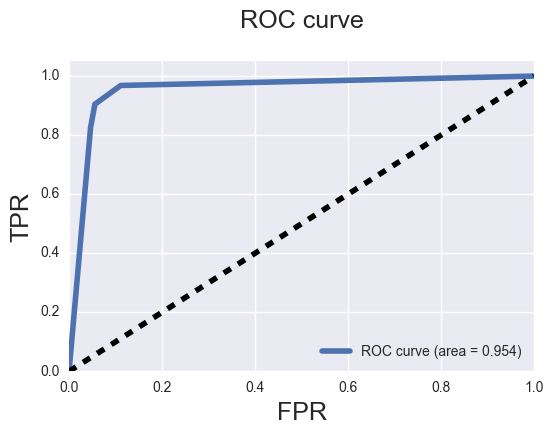

In [9]:
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ROC_AUC = auc(fpr,tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.title('ROC curve\n', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [10]:
# Test trees of higher depth

score_list = []
for depth in range(1, 100):
    model = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
    score_list.append((depth,scores.mean()))
    if depth % 10 == 1:
        print('depth: {}, CV AUC {}, Average AUC {}'.format(depth, scores, scores.mean()))

score_list = np.array(score_list)

depth: 1, CV AUC [ 0.84189276  0.88614341  0.90744467  0.87877264  0.91985245], Average AUC 0.886821185511
depth: 11, CV AUC [ 0.90956072  0.90939922  0.90744467  0.95020121  0.91281019], Average AUC 0.917883203614
depth: 21, CV AUC [ 0.91650517  0.88856589  0.88631791  0.94315895  0.9035882 ], Average AUC 0.907627223288
depth: 31, CV AUC [ 0.91650517  0.89551034  0.90040241  0.94315895  0.91985245], Average AUC 0.915085864021
depth: 41, CV AUC [ 0.91650517  0.90713824  0.91934943  0.94315895  0.91985245], Average AUC 0.921200848502
depth: 51, CV AUC [ 0.91650517  0.91408269  0.90744467  0.94315895  0.91985245], Average AUC 0.92020878501
depth: 61, CV AUC [ 0.91650517  0.90939922  0.91230718  0.91230718  0.89872569], Average AUC 0.909848886601
depth: 71, CV AUC [ 0.90956072  0.89551034  0.91230718  0.94315895  0.89168343], Average AUC 0.910444124696
depth: 81, CV AUC [ 0.91650517  0.92797158  0.89336016  0.93829645  0.91281019], Average AUC 0.917788708998
depth: 91, CV AUC [ 0.91650517

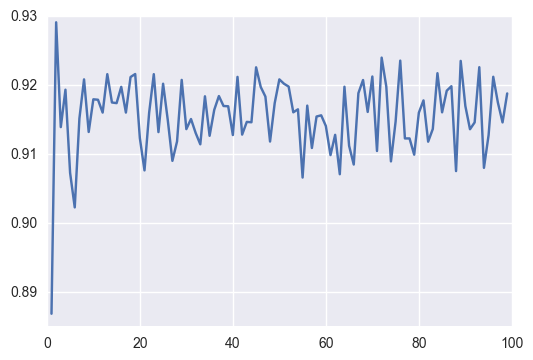

In [12]:
plt.plot(score_list[:100,0],score_list[:100,1])
plt.show()